# Proyecto 1 - NLP

## Revision de ___ en comentarios de libros 

#### Importación de librerias

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re

from wordcloud import WordCloud, STOPWORDS

#### Importación de datos

In [2]:
data = pd. read_csv('data/reviews.csv')

#### Preparación e los datos

1. Se se paro la columna helpfull en dpos columnas. Las veces que se le dio helpfull postivo, y las veces totales que se le ha dado helpful

In [3]:
data['Helpful Total'] = data['helpful'].str.replace("[","")
data['Helpful Total'] = data['Helpful Total'].str.replace("]","")
separacion = data['Helpful Total'].str.split(",",expand=True)
data['Helpful Total']=separacion[1].astype(int)
data['Helpful Positivo']=separacion[0].astype(int)
data

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Helpful Total,Helpful Positivo
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000,0,0
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400,2,2
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600,2,2
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,1,1
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
982614,982614,B00M13FNSS,"[2, 2]",5,Yasss hunny! This is a great read. That Dre is...,"07 23, 2014",A2Y66HD4J5S7QZ,Candi,A Hot Read Indeed!!,1406073600,2,2
982615,982615,B00M13FNSS,"[0, 0]",5,I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...,"07 23, 2014",A17YHECC8H9NEY,Margie,VERY GOOD BOOK,1406073600,0,0
982616,982616,B00M13FNSS,"[1, 1]",5,Great book! Cherika was a fool. She let that m...,"07 23, 2014",A20KO0BPMNREJL,Nicki,Great Read,1406073600,1,1
982617,982617,B00M13FNSS,"[0, 0]",5,When I say this was an excellent book please b...,"07 23, 2014",A1BQO66R6OLCCW,Nikey,Wow!!,1406073600,0,0


2. Se omiteron los regitso que no han sido calificados helpfull ninguna vezy se calculo la tasa de positividad

In [4]:
# Filtar los reviws que no han sido clasificados como helpful
data = data[data["Helpful Total"] >0 ]
data['Helpful Rate'] = data['Helpful Positivo']/data['Helpful Total']
data.head()

<ipython-input-4-44ad27246076>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Helpful Rate'] = data['Helpful Positivo']/data['Helpful Total']


,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Helpful Total,Helpful Positivo,Helpful Rate
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400,2,2,1.0
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600,2,2,1.0
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,1,1,1.0
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,1,0,0.0
7,7,B000F83SZQ,"[1, 1]",4,Never heard of Amy Brewster. But I don't need ...,"03 22, 2014",A3DE6XGZ2EPADS,WPY,Enjoyable reading and reminding the old times,1395446400,1,1,1.0


#### Análisis de los datos

 Distribución de la tasa de postividad en helpfull

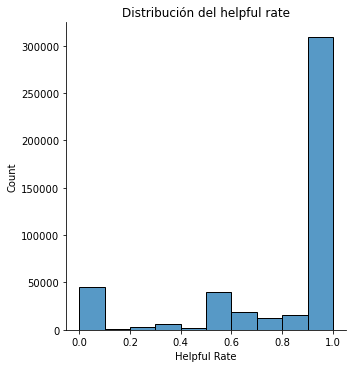

In [5]:
sns.displot(data["Helpful Rate"],bins = 10).set(title="Distribución del helpful rate");

#### Definición  de la vriable de salida

<ipython-input-6-8dc6700f86ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Output"] = np.where(data["Helpful Rate"] >= 0.9,1, 0)


<AxesSubplot:xlabel='Output', ylabel='count'>

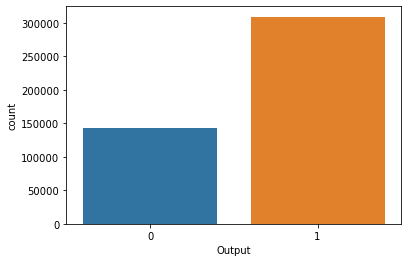

In [6]:
data["Output"] = np.where(data["Helpful Rate"] >= 0.9,1, 0)
sns.countplot(x="Output", data=data)

#### Dataframe NLP 

In [7]:
df = data[["Output", "reviewText"]]
df = df.reset_index()
df = df.drop(columns=["index"])
df.head()

,Output,reviewText
0,1,This book is a reissue of an old one; the auth...
1,1,This was a fairly interesting read. It had ol...
2,1,I'd never read any of the Amy Brewster mysteri...
3,0,"If you like period pieces - clothing, lingo, y..."
4,1,Never heard of Amy Brewster. But I don't need ...


#### Procesamiento de datos

In [8]:
import string
import emoji
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import en_core_web_sm
import unidecode
import unicodedata

In [9]:
# Puntucacion
punctuations = string.punctuation
# Carga los modelos de spacy y las stopwords
parser = en_core_web_sm.load()
stop_words = STOP_WORDS

In [19]:
def clean_text(text):
    # Elimina espacios, emojis, números y convierte todo a minúscula.
    text = str(text)
    text = text.replace('\n','').replace('\r','').replace('\t','').strip().lower()
    text = re.sub(r'\d+', '', text)
    allchars = [str for str in text] 
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    text=''.join((c for c in unicodedata.normalize('NFD',text) if unicodedata.category(c) != 'Mn'))
    text = re.sub('[^0-9a-zA-Z]+', ' ', text)
    # Tokenize
    token = parser(text)
    # Lemmatize
    token = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in token]
    # Quita stopwords y signos de puntuación
    token = ' '.join([word for word in token if word not in stop_words and word not in punctuations])
    token = unidecode.unidecode(token)
    token = ' '.join([w for w in token.split() if len(w)>1])
    return token

In [20]:
df["CleanText"]=df["reviewText"].apply(clean_text)
df.head(10)

,Output,reviewText,CleanText
0,1,This book is a reissue of an old one; the auth...,book reissue old author bear era nero wolfe in...
1,1,This was a fairly interesting read. It had ol...,fairly interesting read old style terminology ...
2,1,I'd never read any of the Amy Brewster mysteri...,read amy brewster mystery hooked
3,0,"If you like period pieces - clothing, lingo, y...",like period piece clothing lingo enjoy mystery...
4,1,Never heard of Amy Brewster. But I don't need ...,hear amy brewster don need like amy brewster l...
5,1,"Another well written eBook by Troy Denning, bu...",write ebook troy den balance point write belon...
6,0,This one promises to be another good book. I h...,promise good book read series far
7,1,Most of the New Jedi Order books focus on the ...,new jedi order book focus solo kid extent view...
8,1,Originally published as an e-book coinciding w...,originally publish book coincide release novel...
9,0,This book was a good idea. I have always wante...,book good idea want read chewbaccas son lumpy ...


In [21]:
df =df.drop(columns="reviewText")
df.to_csv("dataNLP.csv")

#### Exploración

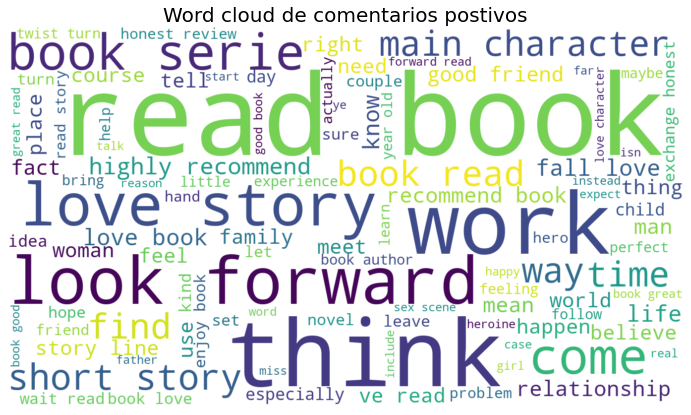

In [29]:
plt.figure(figsize=(14,7))
positive_text = ''.join(df[df['Output'] == 1].CleanText)
word_cloud = WordCloud(stopwords = STOPWORDS, max_words = 100, width=1366, height=768, background_color="white").generate(positive_text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud de comentarios postivos',fontsize=20)
plt.show()

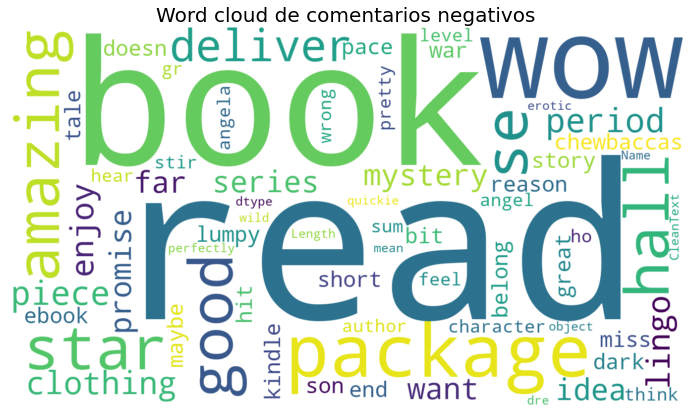

In [28]:
plt.figure(figsize=(14,7))
negative_text = ''.join(str(df[df['Output'] == 0].CleanText))
word_cloud = WordCloud(stopwords = STOPWORDS, max_words = 100, width=1366, height=768, background_color="white").generate(negative_text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud de comentarios negativos',fontsize=20)
plt.show()

#### Conversión a vectores